In [1]:
'''SARIMAX Model'''

# Import Librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Deep Learning with Prajwal'

In [3]:
# Load Data Set

os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day39\\')

In [4]:
df=pd.read_csv('Time_Series_Temp_Data.csv',index_col='DATE',parse_dates=True)
display(df)

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06
...,...,...,...,...
2021-06-03,18.55,83.5,12.0,101.14
2021-06-04,20.80,78.0,18.0,100.85
2021-06-05,22.75,71.5,13.5,100.76


In [5]:
# Update the frequency to Date

df.index_feq='D'
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524 entries, 2020-01-01 to 2021-06-07
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp               524 non-null    float64
 1   relative_humidity  524 non-null    float64
 2   wind_speed         524 non-null    float64
 3   Pressure           524 non-null    float64
dtypes: float64(4)
memory usage: 20.5 KB


<Axes: >

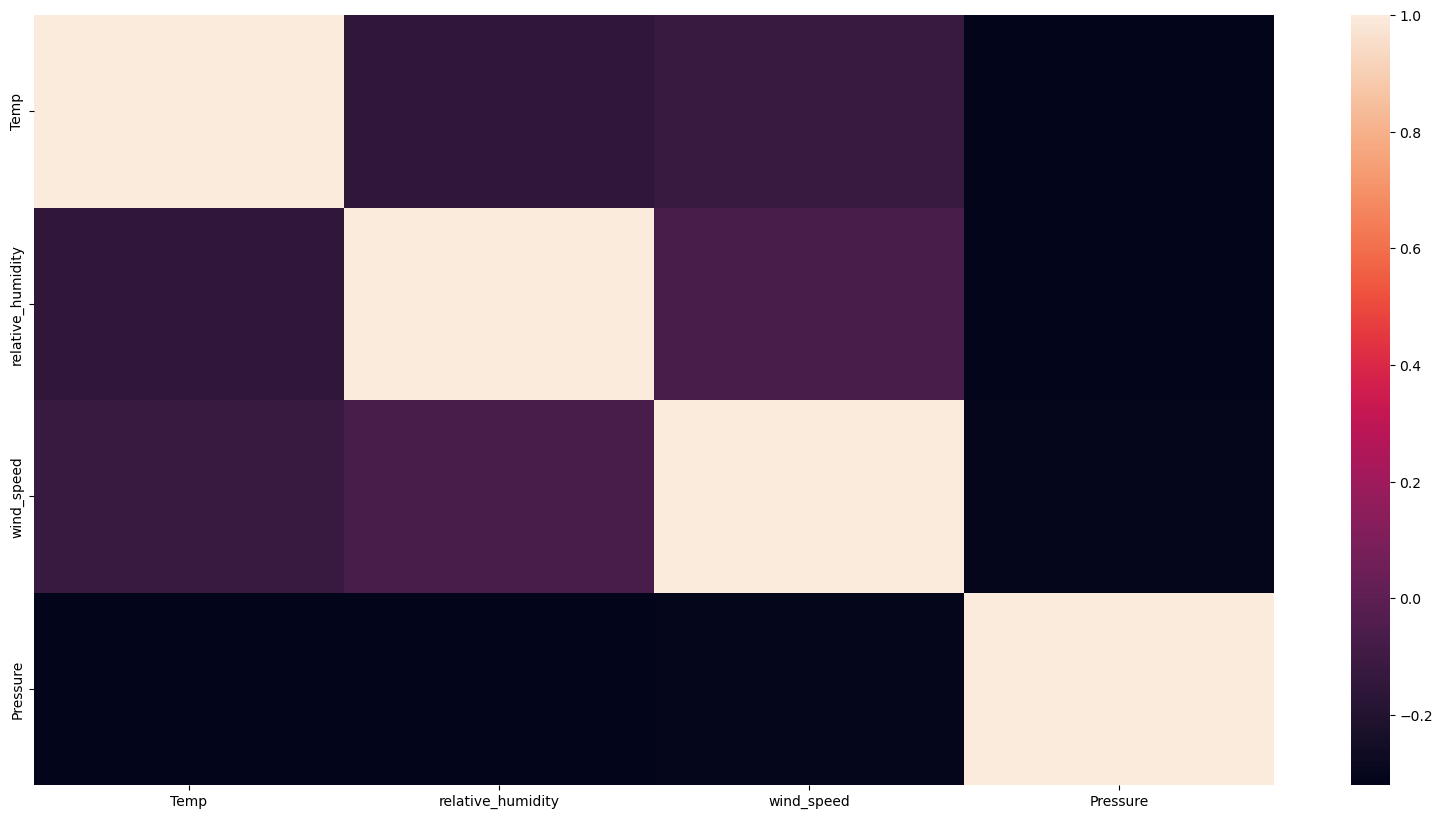

In [6]:
# Create Heat Map

import seaborn as sn
sn.heatmap(df.corr())

In [7]:
# Train Test Split

train=df.iloc[:510,0]
test=df.iloc[510:,0]

In [10]:
train

DATE
2020-01-01    -0.44
2020-01-02    -0.09
2020-01-03     2.95
2020-01-04    -0.80
2020-01-05    -7.95
              ...  
2021-05-20    22.45
2021-05-21    24.65
2021-05-22    22.80
2021-05-23    14.35
2021-05-24    13.55
Name: Temp, Length: 510, dtype: float64

In [9]:
test

DATE
2021-05-25    19.14
2021-05-26    21.95
2021-05-27     8.44
2021-05-28     7.65
2021-05-29    10.90
2021-05-30    11.85
2021-05-31    14.45
2021-06-01    18.20
2021-06-02    18.30
2021-06-03    18.55
2021-06-04    20.80
2021-06-05    22.75
2021-06-06    24.60
2021-06-07    26.10
Name: Temp, dtype: float64

In [12]:
# Create  Independent variables other than temp columns
exo=df.iloc[:,1:4]
exo

,relative_humidity,wind_speed,Pressure
DATE,,,
2020-01-01,86.0,18.5,100.15
2020-01-02,79.0,14.0,100.47
2020-01-03,82.0,12.0,100.64
2020-01-04,86.0,15.0,100.75
2020-01-05,74.5,15.0,101.06
...,...,...,...
2021-06-03,83.5,12.0,101.14
2021-06-04,78.0,18.0,100.85
2021-06-05,71.5,13.5,100.76


In [13]:
# Train Test Split Independent variable

exo_train=exo.iloc[:510]
exo_test=exo.iloc[510:]

In [14]:
exo_train

,relative_humidity,wind_speed,Pressure
DATE,,,
2020-01-01,86.0,18.5,100.15
2020-01-02,79.0,14.0,100.47
2020-01-03,82.0,12.0,100.64
2020-01-04,86.0,15.0,100.75
2020-01-05,74.5,15.0,101.06
...,...,...,...
2021-05-20,55.0,10.0,102.67
2021-05-21,55.5,11.5,102.51
2021-05-22,68.0,19.5,101.77


In [15]:
exo_test

,relative_humidity,wind_speed,Pressure
DATE,,,
2021-05-25,69.0,19.5,101.36
2021-05-26,59.0,23.0,100.67
2021-05-27,47.5,24.5,101.62
2021-05-28,44.5,13.5,102.19
2021-05-29,46.0,17.0,102.18
2021-05-30,52.0,14.5,102.49
2021-05-31,56.0,13.0,102.12
2021-06-01,51.0,14.0,101.92
2021-06-02,55.5,13.0,101.83


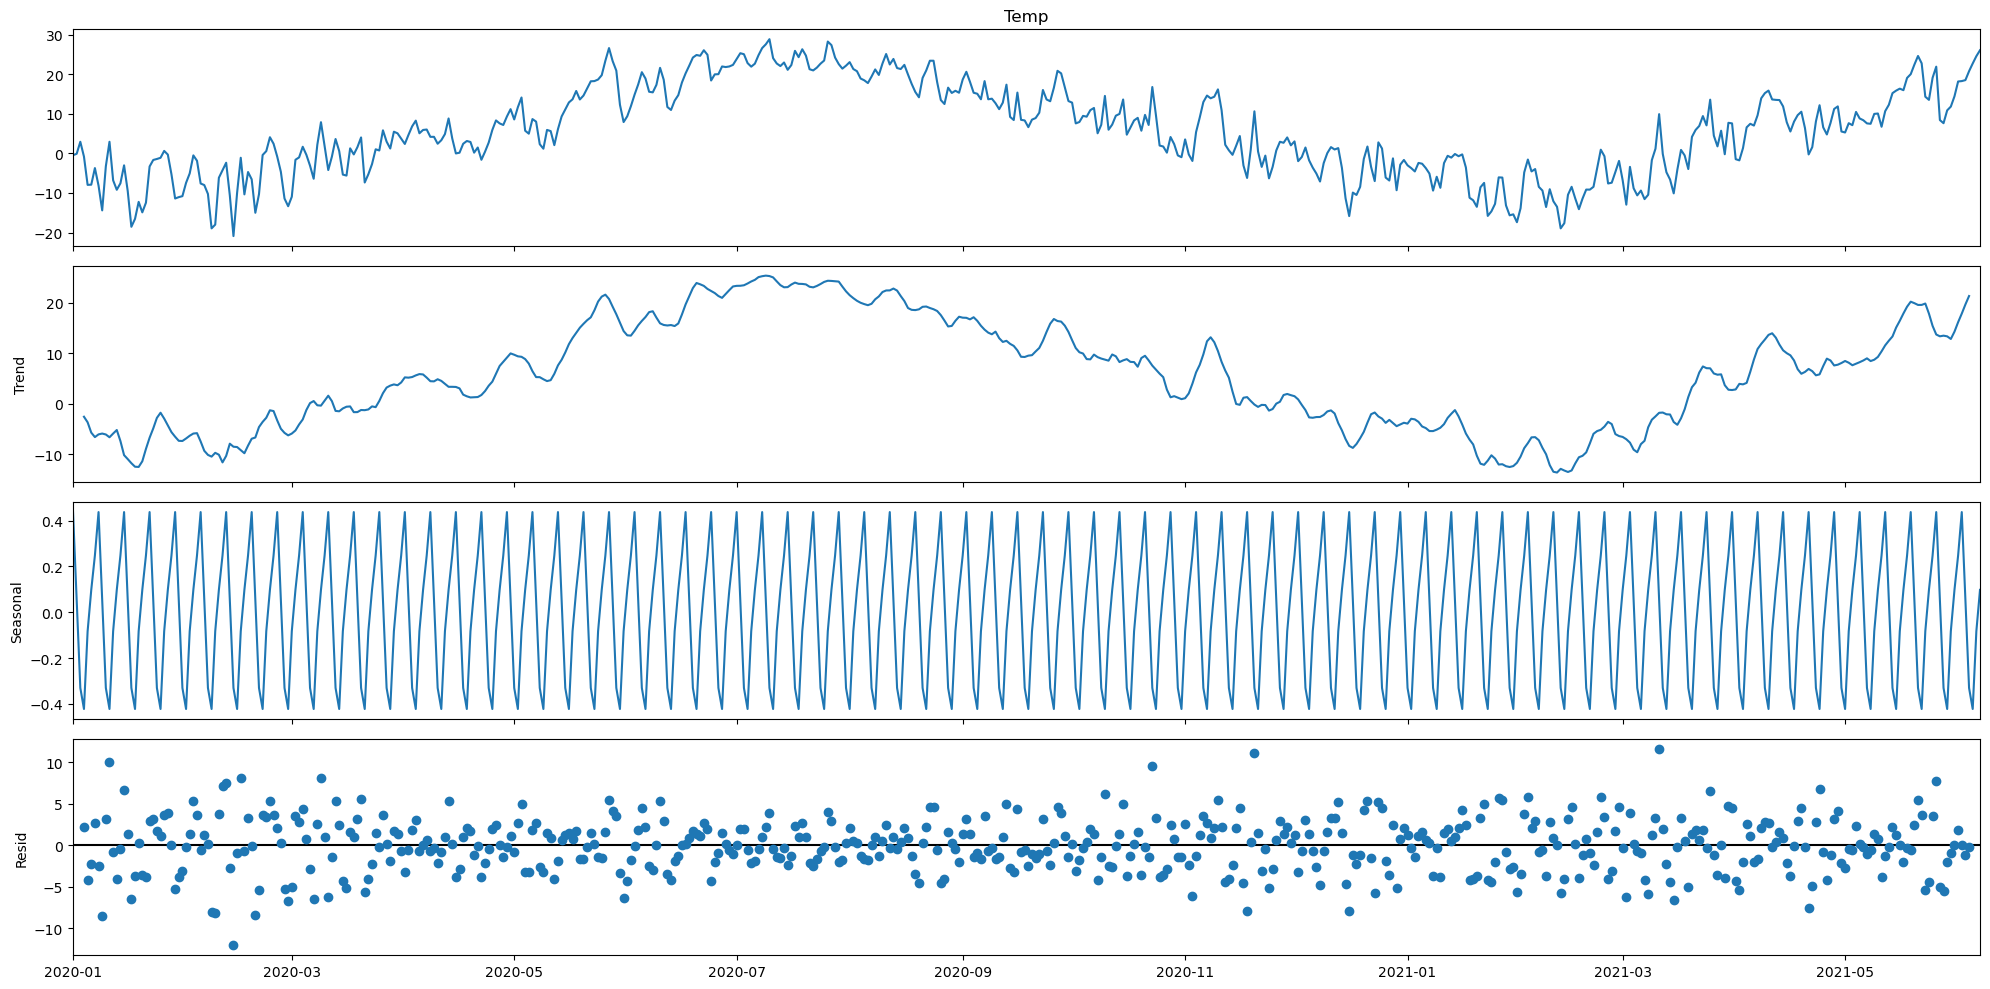

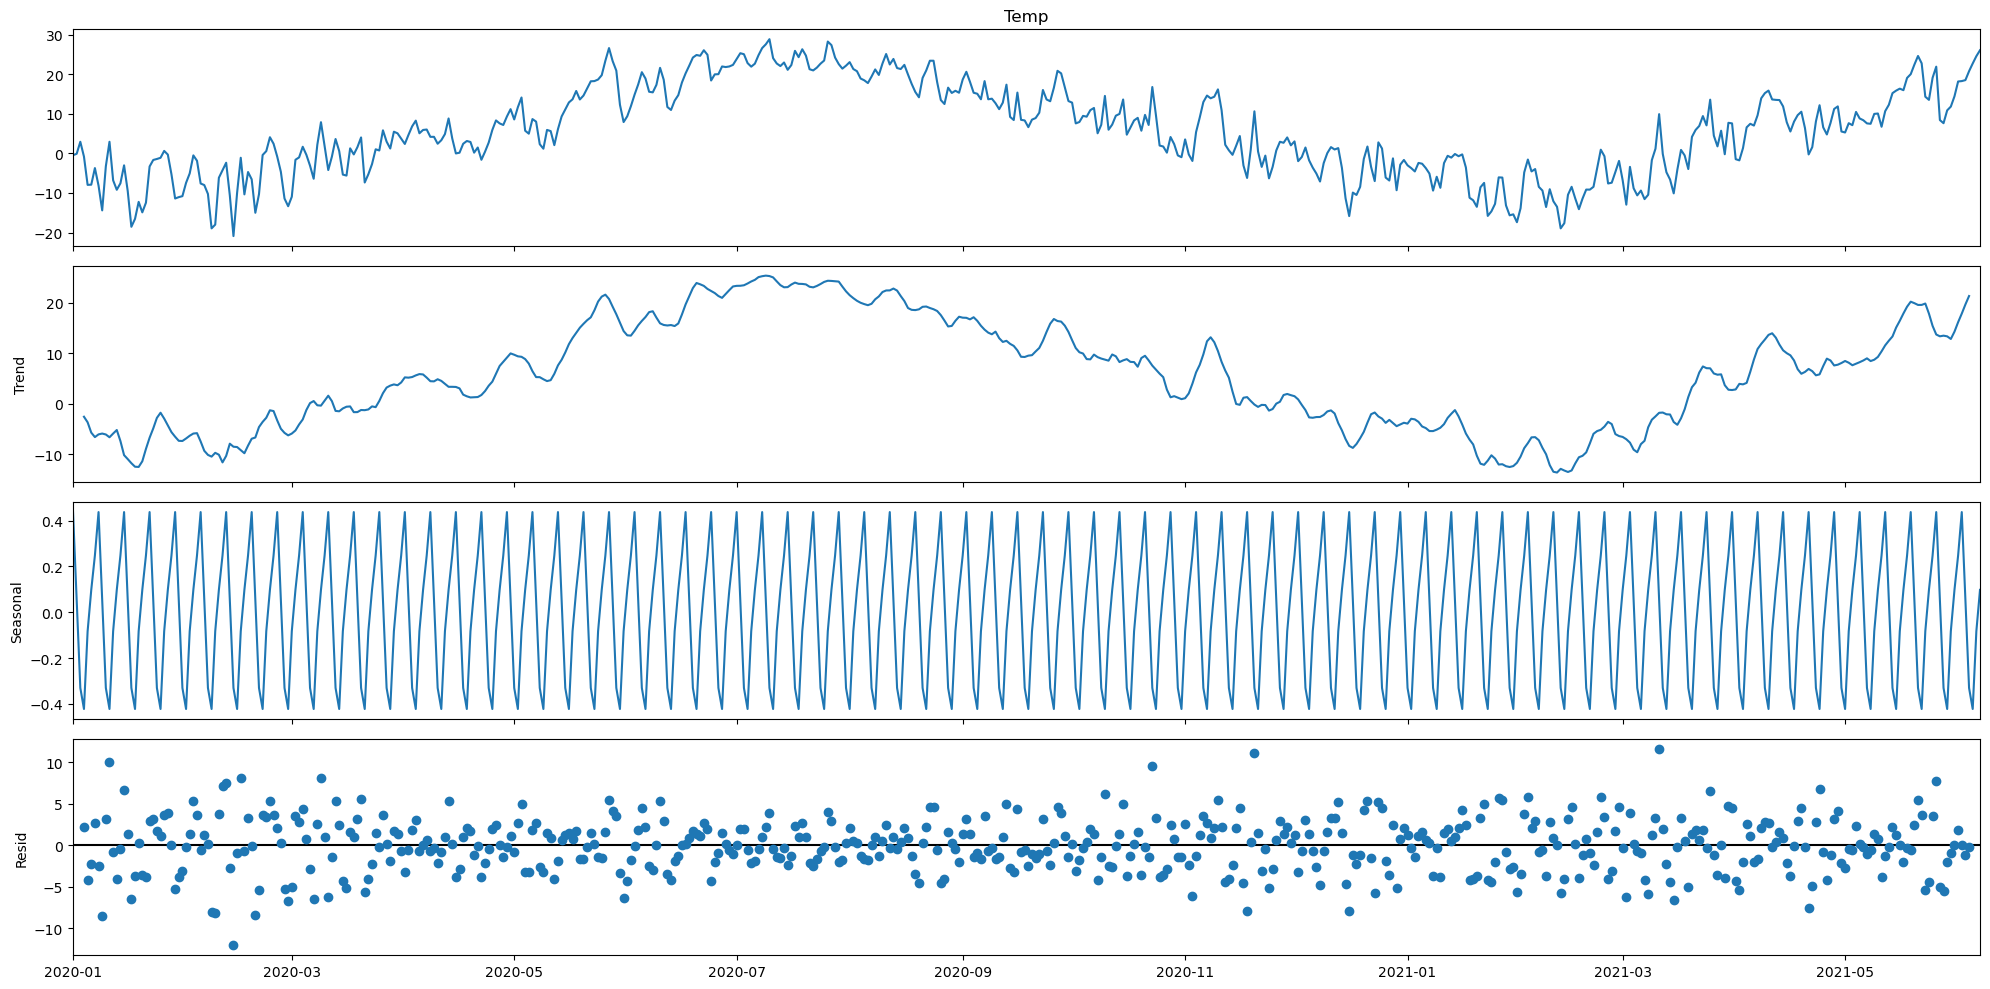

In [16]:
# Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
Decomp_results=seasonal_decompose(df['Temp'])
Decomp_results.plot()

In [18]:
# Auto Arima Parameter

from pmdarima import auto_arima
auto_arima(df['Temp'],exogenous=exo,m=7,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3496.256, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3019.995, Time=0.30 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3035.173, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3495.332, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=3188.466, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2962.667, Time=0.82 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=3320.661, Time=0.60 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2954.772, Time=1.09 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=3003.837, Time=0.39 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=2925.714, Time=1.76 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2923.819, Time=0.57 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  524
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -1447.346
Date:                           Wed, 17 Jul 2024   AIC                           2906.692
Time:                                   22:30:17   BIC                           2932.180
Sample:                               01-01-2020   HQIC                          2916.679
                                    - 06-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3000      0.128      2.336      0.019       0.048       0.552
ar.L2          0.4309      0.117      3.672      0.000       0.201       0.661
ma.L1          0.7082      0.112      6.348      0.000       0.490       0.927
ar.S.L7       -0.1025      0.054     -1.890      0.059      -0.209       0.004
ma.S.L7       -0.7775      0.040    -19.484      0.000      -0.856      -0.699
sigma2        15.5611      0.949     16.390      0.000      13.700      17.422
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                12.11
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# Create SARIMAX Model

from statsmodels.tsa.statespace.sarimax import SARIMAX
Model=SARIMAX(train,exog=exo_train,order=(2,0,2),seasonal_order=(0,1,1,7))
Model=Model.fit()

In [20]:
# Prediction

prediction=Model.predict(len(train),len(train)+len(test)-1,exog=exo_test,typ='levels')
display(prediction)

2021-05-25    16.439581
2021-05-26    19.556901
2021-05-27    16.133262
2021-05-28    14.415790
2021-05-29    14.368874
2021-05-30    13.292125
2021-05-31    14.451845
2021-06-01    15.298597
2021-06-02    15.648918
2021-06-03    17.125227
2021-06-04    17.722695
2021-06-05    18.708731
2021-06-06    17.469292
2021-06-07    16.976446
Freq: D, Name: predicted_mean, dtype: float64

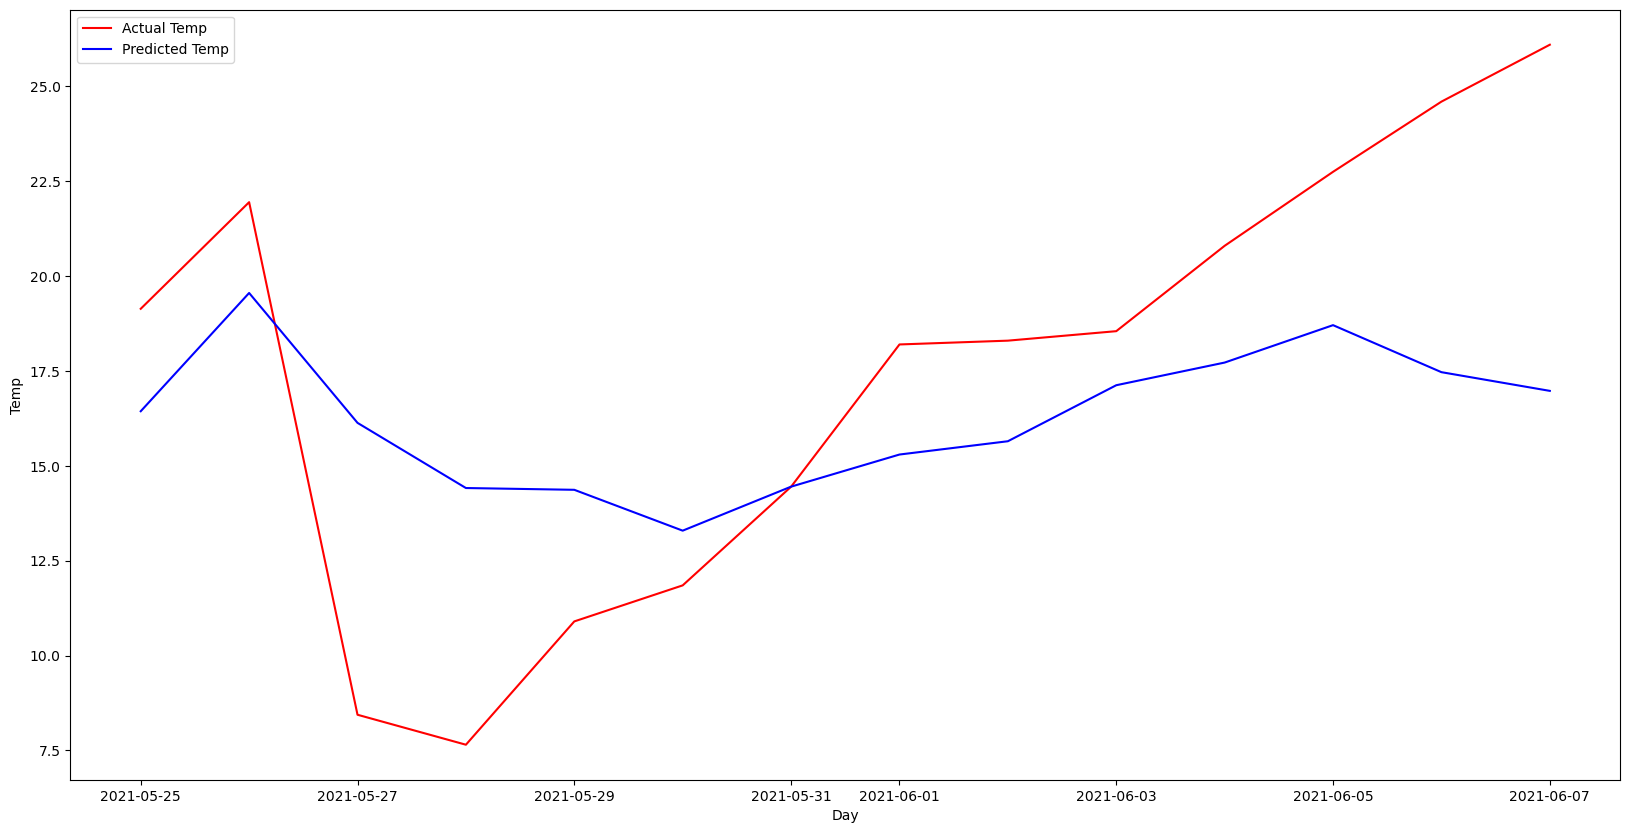

In [21]:
# Plot Graph

plt.plot(test,color='red',label='Actual Temp')
plt.plot(prediction,color='blue',label='Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

In [23]:
# Display RMSE

import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,prediction))
display(rmse)

4.701507699575513

In [24]:
# Accuracy

from sklearn.metrics import r2_score
r2_score(test,prediction)

0.3143163708482406

In [26]:
'''Ok Prajwal Ghotkar 🤓'''

'Ok Prajwal Ghotkar 🤓'